## K-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Alignment-HitTable.csv', header = None)
df.columns = ['query acc.verr', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 
             'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
df.head()

,query acc.verr,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,MN997409.1,MN997409.1,100.00,29882,0,0,1,29882,1,29882,0.0,55182
1,MN997409.1,MT020881.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MT020880.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN985325.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,MN975262.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166


In [3]:
df_numeric = df[['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']]
kmeans = KMeans(n_clusters=5, random_state=10).fit(df_numeric)
y_pred = kmeans.predict(df_numeric)


In [13]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_numeric, y_pred)

In [11]:
silhouette_scores = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(df_numeric)
    silhouette_avg = silhouette_score(df_numeric, cluster_labels)
    silhouette_scores.append(silhouette_avg)

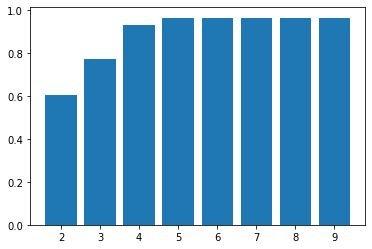

In [12]:
plt.bar(range(2, len(silhouette_scores) +2), silhouette_scores)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized = scaler.fit_transform(df_numeric)
kmeans = KMeans(n_clusters = 5, random_state=0)
kmeans.fit_predict(normalized)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns =df_numeric.columns)
cluster_centers.index = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
print(cluster_centers)

           % identity  alignment length   mismatches   gap opens  \
Cluster 1   79.454500       1957.407407   359.555556   33.629630   
Cluster 2   90.378732       1921.250000   160.500000   12.375000   
Cluster 3   99.975333      29690.577778     5.755556    0.111111   
Cluster 4   82.548218      17798.709091  2918.545455  164.690909   
Cluster 5   80.080943       5447.698113   992.000000   68.584906   

               q. start        q. end      s. start        s. end  evalue  \
Cluster 1     20.944444   1957.925926      4.759259   1941.037037     0.0   
Cluster 2  27896.571429  29802.267857  27730.928571  29646.517857     0.0   
Cluster 3      5.377778  29694.955556      1.022222  29689.244444     0.0   
Cluster 4   3872.781818  21578.963636   3785.345455  21492.363636     0.0   
Cluster 5  22531.716981  27933.490566  22405.603774  27804.660377     0.0   

              bit score  
Cluster 1   1367.111111  
Cluster 2   2534.410714  
Cluster 3  54789.777778  
Cluster 4  15521.654545 